In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.info()
# no null value so can move futhure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.head()
# trespbps=blood pressure
# chol=chalestrol level
# fbs=Sugar level
# thalach=max.heart rate achived
# exang-exercise caused angina

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# feature selection

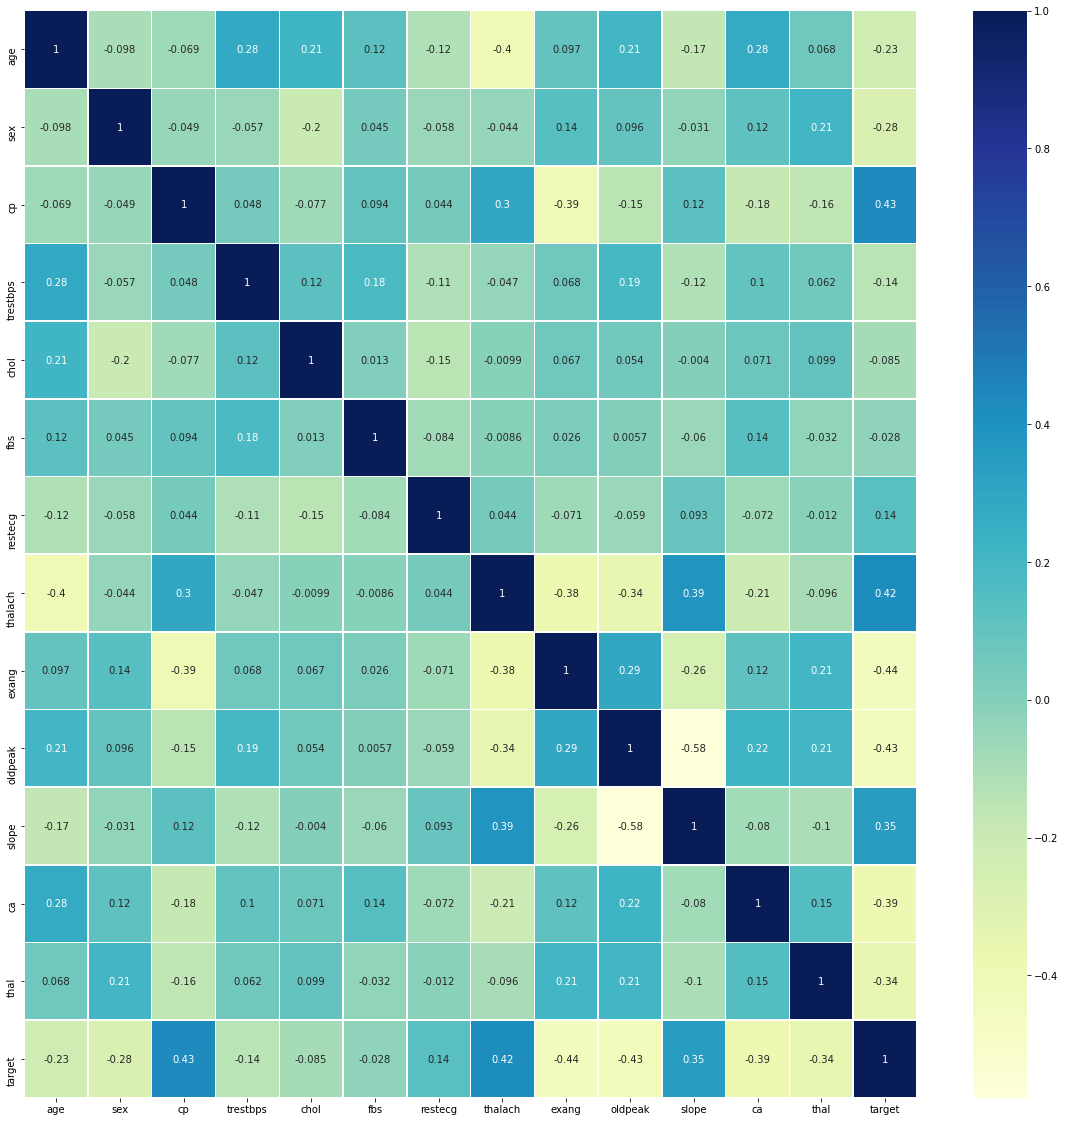

In [7]:
import seaborn as sns
corrmat=df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
map=sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap="YlGnBu",linewidths=.5)

In [8]:
# Age:(+ve correlated to blood preassure(trestbps),chalestrol level,sugar level)(-ve with heart rate)
# CheastPain:(+ve correalted to blood preassure,sugar level,heart rate )(-ve to exercise caused angina)
# Sugar Level:(-vely related to blood preassure)
# chalestrol:(+vely correlated to blood preaddure)
# exercise induced angina:(+vely correlated to resting blood preassure)(-vely correlated to resting heart rate )


<ipython-input-9-79d59cfc256a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED0B9881C0>,
      dtype=object)

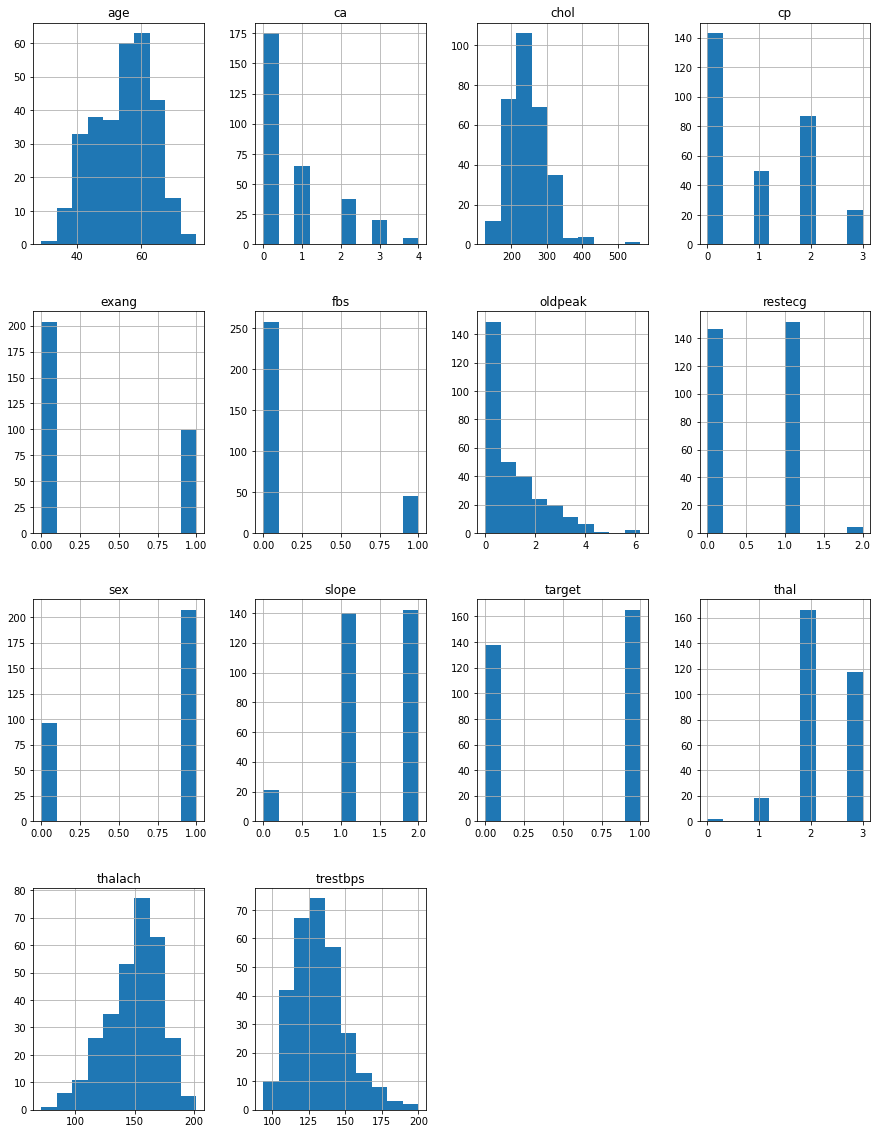

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)


# To check whether the dataset is balanced or not

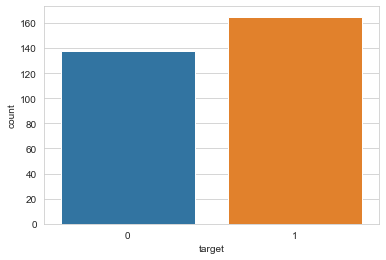

In [10]:
# no need to take sample as almost balanced unlike credit cared default
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)

In [11]:
# to convert to dummy variables
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])


In [12]:
# standard scaling as in diffrent units
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale]=StandardScaler.fit_transform(dataset[columns_to_scale])

In [13]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# knn classifier
#accuracy=84% at 12 knn_neibor

In [14]:
y=dataset['target']
x=dataset.drop(['target'],axis=1)

In [15]:
# Took KNN so x elements can independently determine weather its disease causing elemenet or not by comparing to y
# Randomly took range between 1-20 

from sklearn.model_selection import cross_val_score
knn_score=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_score.append(score.mean())

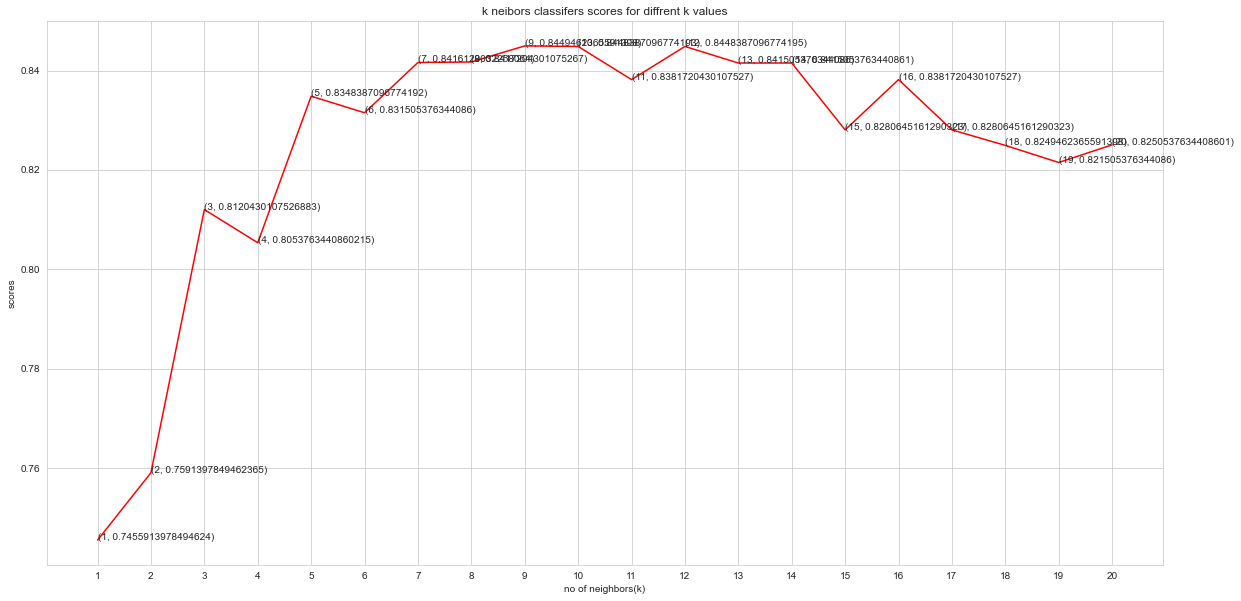

In [16]:
plt.figure(figsize=(20,10))
for i in range(1,21):
    plt.text(i,knn_score[i-1],(i,knn_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('no of neighbors(k)')
plt.ylabel('scores')
plt.title('k neibors classifers scores for diffrent k values')
plt.plot([k for k in range(1,21)],knn_score,color='red')


In [17]:
knn_classifier=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,x,y,cv=10)
score

array([0.90322581, 0.80645161, 0.83870968, 0.93333333, 0.9       ,
       0.8       , 0.83333333, 0.83333333, 0.73333333, 0.86666667])

In [18]:
score.mean()

0.8448387096774195

# Random forest


In [19]:
# Random forest splits on various estimators and also gave nearly same accuracy as KNN(200 decion trees)
randomforest_classifier=RandomForestClassifier(n_estimators=200)
score=cross_val_score(randomforest_classifier,x,y,cv=10) 
score

array([0.90322581, 0.80645161, 0.90322581, 0.93333333, 0.83333333,
       0.8       , 0.73333333, 0.8       , 0.76666667, 0.83333333])

In [20]:
score.mean()

0.8312903225806452

# Decision tree

In [21]:
# Decision tree gave quite less accuracy as took only one tree into considration(20 features in considration)
decisontree_classifier=DecisionTreeClassifier(max_leaf_nodes=10)
decisontree_classifier.fit(x,y)

DecisionTreeClassifier(max_leaf_nodes=10)

In [22]:
score=cross_val_score(decisontree_classifier,x,y,cv=10)
score

array([0.77419355, 0.80645161, 0.83870968, 0.86666667, 0.73333333,
       0.73333333, 0.63333333, 0.66666667, 0.66666667, 0.76666667])

In [23]:
score.mean()

0.7486021505376345

# Concluding Thoughts/Other work needed


In [24]:
# 1) Highest accuracy is recieved in Knn ,even though we increse estimators in Random tree accuracy almost remains same
# 2) Should have deleted last element of dummy variables 